In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('retail_raw_reduced.csv')

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])

# Filter data for December 2019
december_data = df[(df['order_date'].dt.year == 2019) & (df['order_date'].dt.month == 12)]
print(december_data.head(1000))

      order_id order_date  customer_id             city     province  \
8      1741846 2019-12-30        16873    Jakarta Barat  DKI Jakarta   
14     1734790 2019-12-18        17422  Jakarta Selatan  DKI Jakarta   
19     1731961 2019-12-13        13880            Bogor   Jawa Barat   
34     1724590 2019-12-02        15719    Jakarta Barat  DKI Jakarta   
35     1741561 2019-12-29        13521          Bandung   Jawa Barat   
...        ...        ...          ...              ...          ...   
3540   1742638 2019-12-31        17346       Purwokerto  Jawa Tengah   
3541   1728181 2019-12-08        13681    Jakarta Pusat  DKI Jakarta   
3555   1734775 2019-12-18        13263       Yogyakarta   Yogyakarta   
3560   1732534 2019-12-15        17561           Malang   Jawa Timur   
3564   1732456 2019-12-15        16360          Bandung   Jawa Barat   

     product_id    brand  quantity  item_price  
8         P3203  BRAND_S        32      450000  
14        P0122  BRAND_A        12   

DAILY NUMBER OF COSTUMER IN DECEMBER 2019

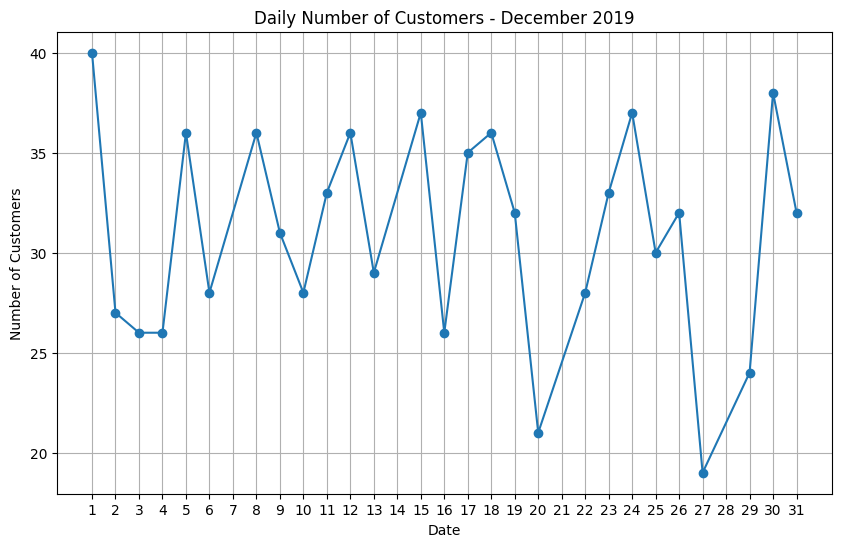

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('retail_raw_reduced.csv', parse_dates=['order_date'])
december_data = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]
daily_customers = december_data.groupby(december_data['order_date'].dt.day)['customer_id'].nunique()
plt.figure(figsize=(10, 6))
plt.plot(daily_customers.index, daily_customers.values, marker='o', linestyle='-')
plt.title('Daily Number of Customers - December 2019')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.xticks(range(1, 32))
plt.grid(True)
plt.show()


CASE 1

In [ ]:
import pandas as pd

df_december = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]

brand_sales = df_december.groupby('brand')['quantity'].sum().sort_values(ascending=False)
top_5_brands = brand_sales.head(5)
top_5_brands_list = top_5_brands.index.tolist()
dataset_top5brand_dec = df_december[df_december['brand'].isin(top_5_brands_list)]

# Menampilkan top 5 brands
print("Top 5 Brands in December 2019:")
print(top_5_brands)


Top 5 Brands in December 2019:
brand
BRAND_S    2197
BRAND_P    2194
BRAND_R    1508
BRAND_C    1365
BRAND_A    1315
Name: quantity, dtype: int64


CASE 2

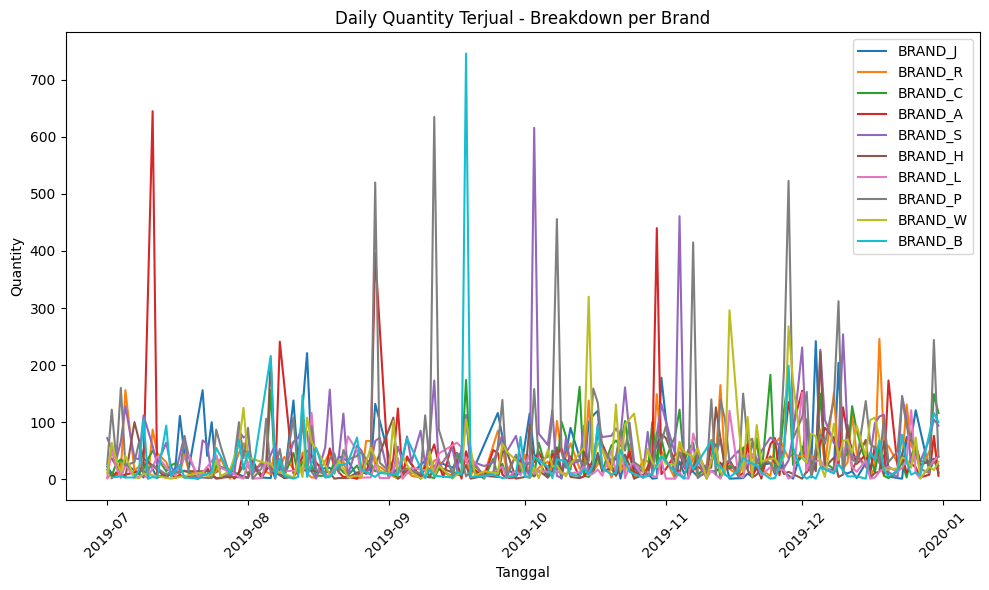

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('retail_raw_reduced.csv')

df['order_date'] = pd.to_datetime(df['order_date'])
df['order_date'] = df['order_date'].dt.date
daily_quantity = df.groupby(['order_date', 'brand'])['quantity'].sum().reset_index()
plt.figure(figsize=(10, 6))
brands = df['brand'].unique()

for brand in brands:
    data = daily_quantity[daily_quantity['brand'] == brand]
    plt.plot(data['order_date'], data['quantity'], label=brand)

max_quantity = daily_quantity.groupby('order_date')['quantity'].max()
peak_date = max_quantity.idxmax()
peak_quantity = max_quantity.max()


plt.title('Daily Quantity Terjual - Breakdown per Brand')
plt.xlabel('Tanggal')
plt.ylabel('Quantity')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


CASE 3

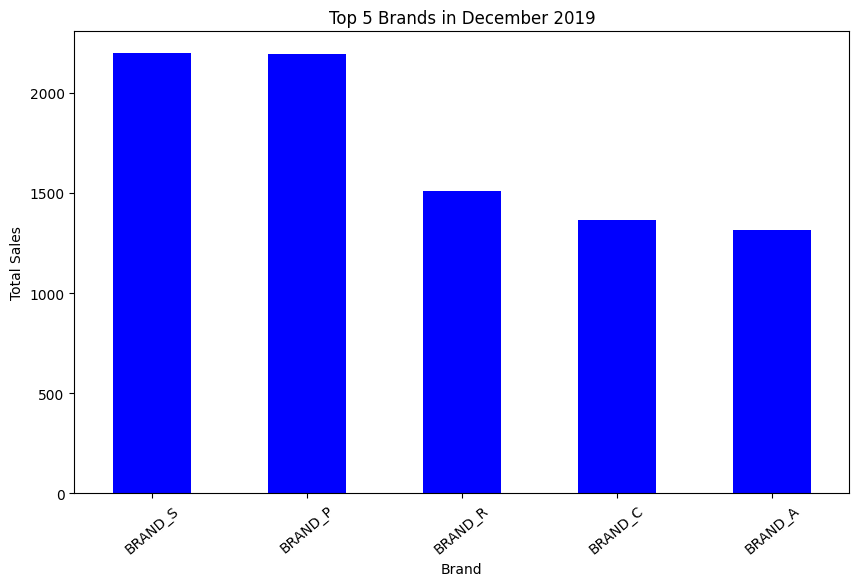

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['order_date'] = pd.to_datetime(df['order_date'])
df_december = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]
brand_sales = df_december.groupby('brand')['quantity'].sum().sort_values(ascending=False)
top_5_brands = brand_sales.head(5)
plt.figure(figsize=(10, 6))
top_5_brands.plot(kind='bar', color='blue')
plt.title('Top 5 Brands in December 2019')
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.xticks(rotation=40)
plt.show()


CASE 4

<Figure size 2000x500 with 0 Axes>

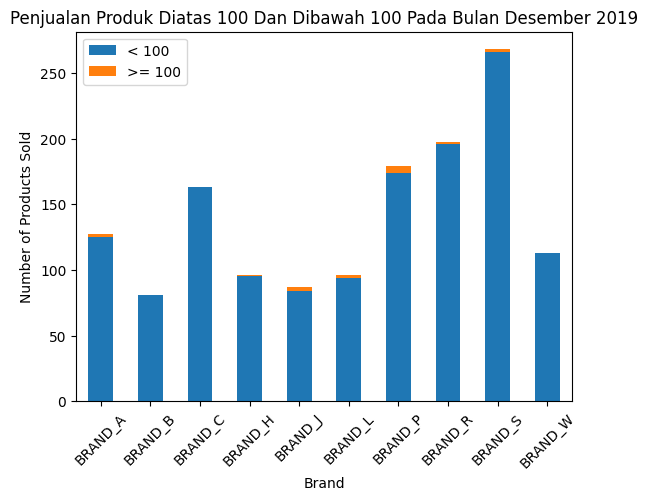

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('retail_raw_reduced.csv', parse_dates=['order_date'])

# Mengambil data untuk bulan Desember 2019
december_data = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]

# Menghitung jumlah produk terjual per brand
product_count = december_data.groupby(['brand', (december_data['quantity'] >= 100)])['product_id'].count().unstack()

# Membuat stacked chart
plt.figure(figsize=(20, 5))
product_count.plot(kind='bar', stacked=True)
plt.title('Penjualan Produk Diatas 100 Dan Dibawah 100 Pada Bulan Desember 2019')
plt.xlabel('Brand')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45)
plt.legend(['< 100', '>= 100'])
plt.show()


CASE 5

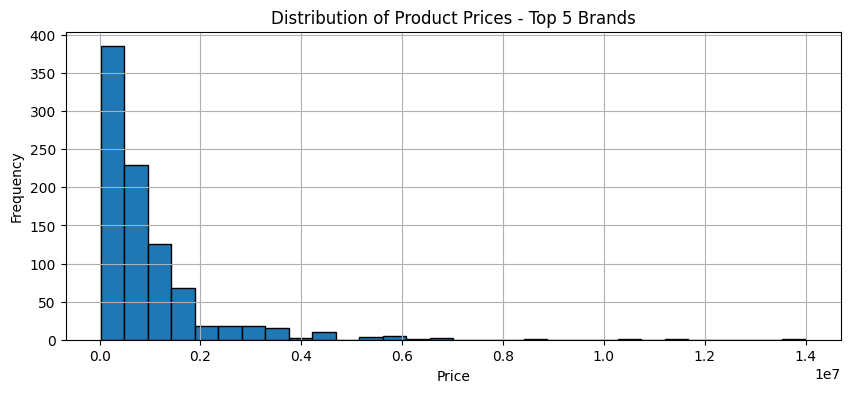

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('retail_raw_reduced.csv')

# Mengambil data untuk top 5 brand
top_5_brands = df['brand'].value_counts().head(5).index.tolist()
top_5_data = df[df['brand'].isin(top_5_brands)]

# Menghitung median harga per product_id
product_prices = top_5_data.groupby('product_id')['item_price'].median()

# Membuat histogram
plt.figure(figsize=(10, 4))
plt.hist(product_prices, bins=30, edgecolor='black')
plt.title('Distribution of Product Prices - Top 5 Brands')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


CASE 6A

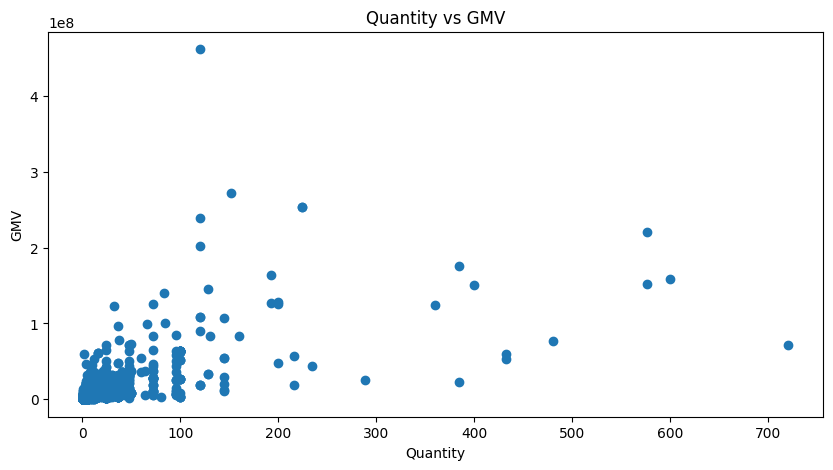

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('retail_raw_reduced.csv')
df['GMV'] = df['item_price'] * df['quantity']
plt.figure(figsize=(10, 5))
plt.scatter(df['quantity'], df['GMV'])
plt.title('Quantity vs GMV')
plt.xlabel('Quantity')
plt.ylabel('GMV')
plt.show()

CASE 6B

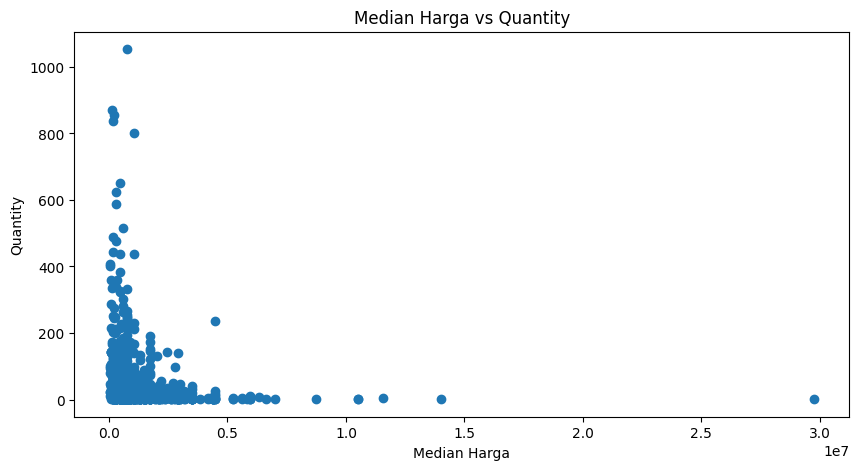

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('retail_raw_reduced.csv')
df['GMV'] = df['item_price'] * df['quantity']
product_prices = df.groupby('product_id')['item_price'].median()
product_quantities = df.groupby('product_id')['quantity'].sum()
plt.figure(figsize=(10, 5))
plt.scatter(product_prices, product_quantities)
plt.title('Median Harga vs Quantity')
plt.xlabel('Median Harga')
plt.ylabel('Quantity')
plt.show()